In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools


c:\Users\usuario\Fer-Pc\Escritorio\EPN\2024-A\SEPTIMO_SEMESTRE\RECUPERACION_DE_INFORMACION\ir24a\venv3.8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',
    split=['train[:80%]', 'test[20%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\usuario\\Fer-Pc\\Escritorio\\EPN\\2024-A\\SEPTIMO_SEMESTRE\\RECUPERACION_DE_INFORMACION\\ir24a\\week14\\data',
    download=True,
)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)


In [9]:
# Agregar Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [10]:
# Definir el modelo
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [16]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Entrenar el modelo
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
77/77 [==============================] - 102s 1s/step - loss: 3.6217 - accuracy: 0.1577 - val_loss: 3.4737 - val_accuracy: 0.2693
Epoch 2/20
77/77 [==============================] - 113s 1s/step - loss: 3.4896 - accuracy: 0.1847 - val_loss: 3.4715 - val_accuracy: 0.2736
Epoch 3/20
77/77 [==============================] - 126s 2s/step - loss: 3.3885 - accuracy: 0.2109 - val_loss: 3.3145 - val_accuracy: 0.3069
Epoch 4/20
77/77 [==============================] - 129s 2s/step - loss: 3.2787 - accuracy: 0.2211 - val_loss: 3.3064 - val_accuracy: 0.2993
Epoch 5/20
77/77 [==============================] - 121s 2s/step - loss: 3.1971 - accuracy: 0.2264 - val_loss: 3.2390 - val_accuracy: 0.3088
Epoch 6/20
77/77 [==============================] - 129s 2s/step - loss: 3.1452 - accuracy: 0.2325 - val_loss: 3.2801 - val_accuracy: 0.3198
Epoch 7/20
77/77 [==============================] - 133s 2s/step - loss: 3.0438 - accuracy: 0.2628 - val_loss: 3.1599 - val_accuracy: 0.3332
Epoch 8/20
77

In [18]:
# Evaluar el modelo
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')

Number of trainable parameters in the model: 9730854
153/153 - 24s - loss: 2.9592 - accuracy: 0.3954 - 24s/epoch - 156ms/step
Test accuracy: 0.39543959498405457


In [19]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')

Number of trainable parameters in the model: 9730854
153/153 - 24s - loss: 2.9592 - accuracy: 0.3954 - 24s/epoch - 160ms/step
Test accuracy: 0.39543959498405457


1/1 [==============================] - 0s 93ms/step


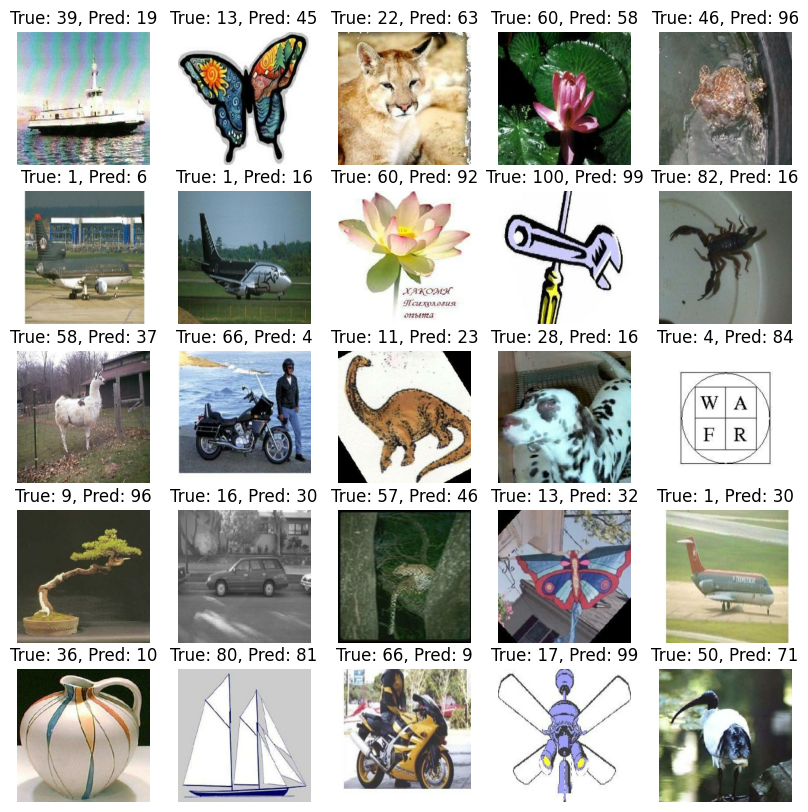

In [20]:
misclassified_images = []
misclassified_labels = []
true_labels = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_labels != labels.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(images[idx])
        misclassified_labels.append(predicted_labels[idx])
        true_labels.append(labels.numpy()[idx])

plt.figure(figsize=(10, 10))
for i in range(len(misclassified_images)):
    if i >= 25:  # Limit to 25 images
        break
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"True: {true_labels[i]}, Pred: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 45ms/step


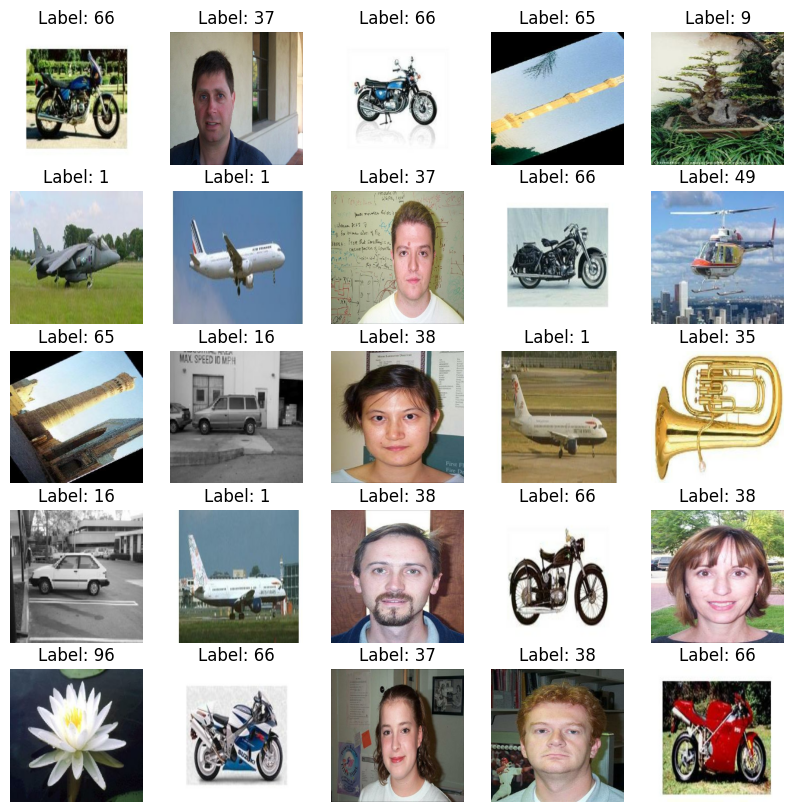

In [21]:
correct_images = []
correct_labels = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    correct_idx = np.where(predicted_labels == labels.numpy())[0]
    for idx in correct_idx:
        correct_images.append(images[idx])
        correct_labels.append(predicted_labels[idx])

plt.figure(figsize=(10, 10))
for i in range(len(correct_images)):
    if i >= 25:  # Limit to 25 images
        break
    plt.subplot(5, 5, i+1)
    plt.imshow(correct_images[i])
    plt.title(f"Label: {correct_labels[i]}")
    plt.axis('off')
plt.show()
